# Assignment 3 - Tashlin Reddy
- Donwload  ziptrain.csv and ziptest.csv datasets from  https://github.com/vahidpartovinia/ycbs255/

# 1- Differentiate digit 2 from Digit 7
## 1.1- Two principal components
- Select only digit 2, and digit 7 from ziptrain data set. 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates digit 2 from digit 7.

## 1.2- Logistic regression
- Fit a logistic regression to separate digit 2 from digit 7 over the projected 2 principal components.  Remember in logistic regression, classes are differentiated using 0 and 1 (and not 2 or 7).
- Build the confusion matrix on ziptest and check how well the model works on the test data.

# 2 -Multiple principal components
- Project train data onto "m = 2, 3, ..." principal components.
- Choose an "m" so that the classification of digit 2 and 7 is the most precise on ziptest.

# 3-Differentiate all digits 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates all digits properly.
- Use linear discriminant on ziptrain over 256 original pixels and build the confusion matrix of this model over ziptrain
- Use linear disciminant over "m" projected principal components, with the appropriate choice of "m" (where the precision of prediction maximizes over ziptest data set).


# Submission note
Please fill this jupyter notebook. Extract the pdf file as follows. On  Jupyter manue go to File/Print Preview, then on Browser menu go to File/Print. 

## Only PDF  Submissions will be graded



### 1- Differentiate Digit 2 from Digit 7
#### 1.1 - Two Principal components

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
#load data from url
ztrain = np.loadtxt("https://raw.githubusercontent.com/vahidpartovinia/ycbs255/master/jupyter/data/ziptrain.csv")
ztest = np.loadtxt("https://raw.githubusercontent.com/vahidpartovinia/ycbs255/master/jupyter/data/ziptest.csv")

In [54]:
#get general idea of data
# 1st column contains digit label, next 256 coloumns contain pixel/image data

ztrain.shape

(7291, 257)

##### Select only digit 2, and digit 7 from ziptrain data set.

In [55]:
z2 = ztrain[ztrain[:,0]==2]
z7 = ztrain[ztrain[:,0]==7]

In [56]:
# stack both arrays to create 1 for analysis
z27 = np.vstack([z2, z7])

##### Project zip train onto 2 principal components

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components =2 )

In [59]:
pca.fit(z27[:,1:])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

##### Make a scatterplot to confirm wheather or not only two principal components separates digit 2 from digit 7.

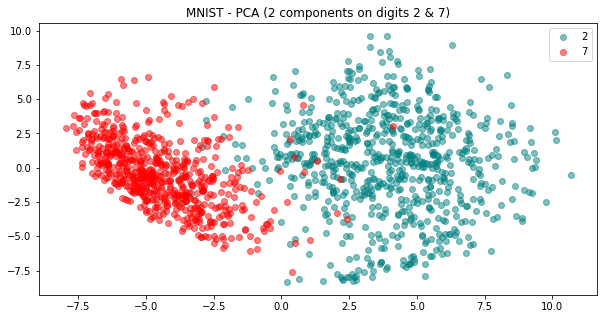

In [60]:
X_train = pca.transform(z27[:,1:])
plt.figure(figsize=(10,5))
twos = plt.scatter(X_train[z27[:,0]==2,0], X_train[z27[:,0]==2,1], c= 'teal', alpha = 0.5, label = '2')
sevens = plt.scatter(X_train[z27[:,0]==7,0], X_train[z27[:,0]==7,1], c= 'red', alpha = 0.5, label= '7')
plt.legend(handles = [twos,sevens])
plt.title("MNIST - PCA (2 components on digits 2 & 7)");

Seems like 2 components seperates digits 2 and 7 very well at first glance.


#### 1.2- Logistic regression

In [61]:
z27[10:,0]

array([2., 2., 2., ..., 7., 7., 7.])

In [62]:
y_train = z27

In [63]:
#convert 2's to 0 and 7's to 1 for logistic regression
y_train[y_train == 2] = 0
y_train[y_train == 7] = 1

In [64]:
#double check to make sure
y_train[10:,0]

array([0., 0., 0., ..., 1., 1., 1.])

In [65]:
# for y data only the labels are needed
y_train = y_train[:,0]
y_train.shape

(1376,)

##### Fit a logistic regression to separate digit 2 from digit 7 over the projected 2 principal components. Remember in logistic regression, classes are differentiated using 0 and 1 (and not 2 or 7).

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
#initialize log reg
lr = LogisticRegression()

In [68]:
print(X_train.shape)
print(y_train)

(1376, 2)
[0. 0. 0. ... 1. 1. 1.]


In [69]:
# fit model
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
# get test data for 2's and 7's
z_logtest = np.vstack([ztest[ztest[:,0]==2], ztest[ztest[:,0]==7]])

In [71]:
# convert test data to two components
pca_test = PCA(n_components= 2)

In [72]:
pca_test.fit(z_logtest[:,1:])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [73]:
# fit and transform test data, excluding the labels
X_test = pca_test.fit_transform(z_logtest[:,1:])

In [74]:
X_test.reshape(-1,2)[:10]

array([[ 4.50521404, -2.07098109],
       [ 2.39924438, -3.8570604 ],
       [ 6.21551353, -4.26371048],
       [ 6.19692187, -8.38998228],
       [ 1.10698703, -3.64123218],
       [ 2.85319621, -2.51895702],
       [ 3.85306819, -1.52082617],
       [ 7.61166713, -1.60352402],
       [-0.10629816,  1.1480396 ],
       [ 3.0543291 , -0.20206168]])

In [75]:
#convert label test data to 0's and 1's for prediction
y_test = z_logtest[:,0]
y_test[y_test==2]=0
y_test[y_test==7]=1

##### Build the confusion matrix on ziptest and check how well the model works on the test data.


In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = lr.predict(X_test.reshape(-1,2))
print("confusion matrix \n",confusion_matrix(y_test, y_pred))
print("accuracy score:", accuracy_score(y_test, y_pred))

confusion matrix 
 [[187  11]
 [ 14 133]]
accuracy score: 0.927536231884058


In total we have 25 (11+14) incorrect predictions. 

### 2 -Multiple principal components

#### Project train data onto "m = 2, 3, ..." principal components.

In [79]:
iter_ = 15
list1 = list(range(iter_))
for m in range(2,iter_+2):
    pca_train = PCA(n_components = m)
    pca_test = PCA(n_components = m)
    X_train = pca_train.fit_transform(z27[:,1:])
    X_test = pca_test.fit_transform(z_logtest[:,1:])
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test.reshape(-1,m))
    acc_score = accuracy_score(y_test, y_pred)
    list1[m-2] = acc_score

##### Choose an "m" so that the classification of digit 2 and 7 is the most precise on ziptest.

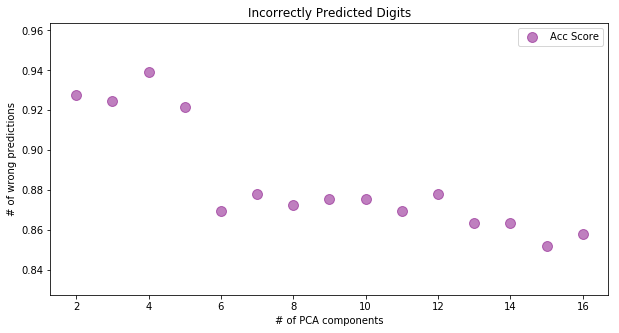

In [80]:
# Plot "m" vs incorrect predictions to get an idea of best "m"
components = list(range(2,iter_+2))
plt.figure(figsize=(10,5))
plt.scatter(components, list1, label = 'Acc Score', c = 'purple' , s= 100,  alpha = 0.5)

plt.legend()
plt.title("Incorrectly Predicted Digits")
plt.xlabel("# of PCA components")
plt.ylabel("# of wrong predictions")
plt.show()

Here we projected train data onto 2 to 16 principal components. There was little need to project more components as a trend was established.

We want to minimize the amount of INCORRECT predictions, so from our analysis, 4 principal components seems to be the best for prediction.

### 3-Differentiate all digits
##### Project ziprain onto two principal components

In [81]:
pca_all = PCA(n_components=2)
Xall_train = pca_all.fit_transform(ztrain[:,1:])

##### Make a scatterplot to confirm wheather or not only two principal components separates all digits properly.

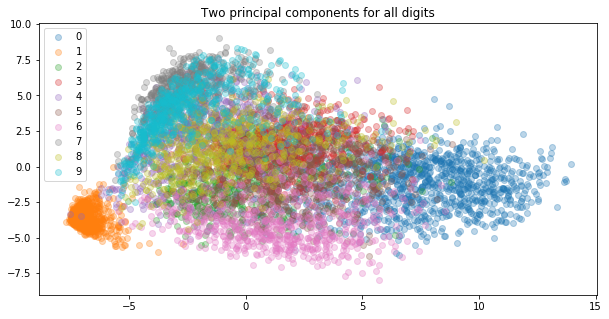

In [29]:
plt.figure(figsize = (10,5))
for i in range(10):
    plt.scatter(Xall_train[ztrain[:,0]==i,0],Xall_train[ztrain[:,0]==i,1], alpha= 0.3, label = str(i))
plt.legend()
plt.title('Two principal components for all digits')
plt.show()

2 components clearly DOES NOT seperate all digits



##### Use linear discriminant on ziptrain over 256 original pixels and build the confusion matrix of this model over ziptrain

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [86]:
lda.fit(ztrain[:,1:], ztrain[:,0])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [87]:
y_lda_pred = lda.predict(ztest[:,1:])

In [88]:
y_lda_test = ztest[:,0]

In [89]:
a = confusion_matrix(y_lda_test,y_lda_pred)
print(a)

[[342   0   0   4   3   1   5   0   3   1]
 [  0 251   0   2   5   0   3   0   1   2]
 [  7   2 157   4  12   2   1   1  12   0]
 [  3   0   3 142   3   9   0   1   4   1]
 [  1   4   6   0 174   0   2   2   1  10]
 [  6   0   0  16   3 125   0   0   5   5]
 [  1   0   3   0   3   3 157   0   3   0]
 [  0   1   0   2   7   0   0 129   1   7]
 [  5   0   2  11   7   4   0   0 135   2]
 [  0   0   0   0   4   0   0   5   3 165]]


In [90]:
sum(a.diagonal())

1777

#### Use linear disciminant over "m" projected principal components, with the appropriate choice of "m" (where the precision of prediction maximizes over ziptest data set).

In [98]:
from sklearn.metrics import accuracy_score
iter_lda = 30
list_lda = list(range(iter_lda))
list_score = list(range(iter_lda))
list_base_score = list(range(iter_lda))

y_lda_train = ztrain[:,0]
y_lda_test = ztest[:,0]

for m in range(2,iter_lda+2):
    pca_train = PCA(n_components = m)
    pca_test = PCA(n_components = m)
    X_train = pca_train.fit_transform(ztrain[:,1:])
    X_test = pca_test.fit_transform(ztest[:,1:])
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train,y_lda_train)
    y_lda_pred = lda.predict(X_test.reshape(-1,m))
    #con_mat = confusion_matrix(y_lda_test, y_lda_pred)
    
    #list_lda[m-2] = sum(con_mat.diagonal())
    
    acc_scor = accuracy_score(y_lda_test,y_lda_pred)
    #score = lda.score(y_lda_test,y_lda_pred)
    list_score[m-2] =  acc_scor
    #list_base_score[m-2] = score


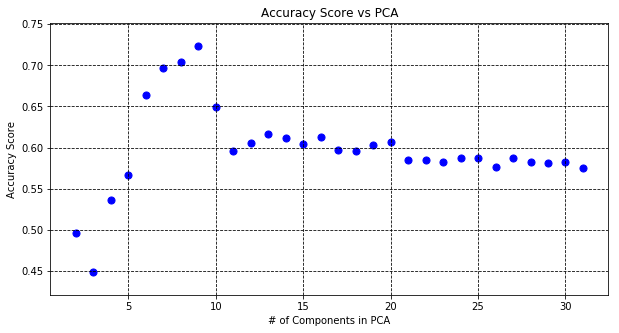

In [99]:
components_lda = list(range(2,iter_lda+2))
plt.figure(figsize = (10,5))
plt.scatter(components_lda,list_score , s = 50, c = 'blue')
#plt.scatter(components_lda,list_logloss , s = 50, c = 'red')
plt.title('Accuracy Score vs PCA')
plt.xlabel('# of Components in PCA')
plt.ylabel('Accuracy Score')
plt.rc('grid', linestyle="--", color='black')
plt.grid(True)
plt.show()

We want to maximize CORRECTLY PREDICTED DIGITS. From our plot it seems like 9 principal components maximizes our prediction. 

In [38]:
print(sum(a.diagonal()))
print(max(list_lda))

1777
1452
